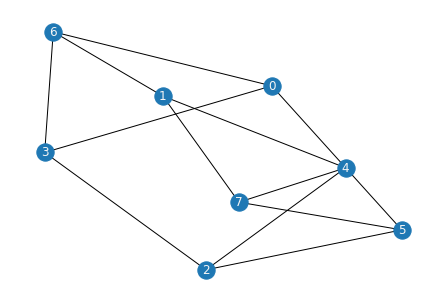

In [1]:
from maxcut_instance_generator import regular_graph

graph, model = regular_graph(num_nodes=8, degree=3, draw=True)

In [2]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
# qrac_1_1 = RandomAccessEncoder(1, 1)
# qrac_2_1 = RandomAccessEncoder(2, 1)
qrac_3_1 = RandomAccessEncoder(3, 1)
# qrac_3_1_big = RandomAccessEncoder(3, 1)

# Hamiltonians
# H_1_1 = qrac_1_1.generate_hamiltonian(model)
# H_2_1 = qrac_2_1.generate_hamiltonian(model)
H_3_1 = qrac_3_1.generate_hamiltonian(model)
# H_3_1_big = qrac_3_1_big.generate_hamiltonian(model_big)

# Print Hamiltonians
# print(qrac_1_1.print_hamiltonian(H_1_1))
# print(qrac_2_1.print_hamiltonian(H_2_1))
print(qrac_3_1.print_hamiltonian(H_3_1))
# print(qrac_3_1_big.print_hamiltonian(H_3_1_big))

(1.5+0j)XXI
(1.5+0j)XZI
(1.5+0j)XIX
(1.5+0j)YYI
(1.5+0j)YIX
(1.5+0j)YIY
(1.5+0j)ZXI
(1.5+0j)ZYI
(1.5+0j)ZZI
(1.5+0j)IXX
(1.5+0j)IYY
(1.5+0j)IZY
(-6+0j)III
None


In [3]:
# print(
#     len(qrac_1_1.qubit_to_vertex_map), len(qrac_1_1.calculate_edge_among_qubits(model))
# )
# print(
#     len(qrac_2_1.qubit_to_vertex_map), len(qrac_2_1.calculate_edge_among_qubits(model))
# )
print(
    len(qrac_3_1.qubit_to_vertex_map), len(qrac_3_1.calculate_edge_among_qubits(model))
)
# print(
#     len(qrac_3_1_big.qubit_to_vertex_map), len(qrac_3_1_big.calculate_edge_among_qubits(model_big))
# )

3 3


In [4]:
import numpy as np
from vqe import VQEForQRAO

from scipy.optimize import minimize

# Example of Level = 1
# vqe_1_1 = VQEForQRAO(
#     hamiltonian=H_1_1,
#     rotation_gate="normal",
#     entanglement="compatible",
#     num_layer=1,
#     qubit_pairs=qrac_1_1.calculate_edge_among_qubits(model),
#     printing=True,
# )
# vqe_2_1 = VQEForQRAO(
#     hamiltonian=H_2_1,
#     rotation_gate="normal",
#     entanglement="compatible",
#     num_layer=1,
#     qubit_pairs=qrac_2_1.calculate_edge_among_qubits(model),
#     printing=True,
# )
vqe_3_1 = VQEForQRAO(
    hamiltonian=H_3_1,
    rotation_gate="efficientSU2",
    entanglement="compatible",
    num_layer=3,
    qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
    printing=True,
)
vqe_3_1_2 = VQEForQRAO(
    hamiltonian=H_3_1,
    rotation_gate="efficientSU2",
    entanglement="compatible",
    method="NFT",
    options=None,
    num_layer=3,
    qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
    printing=False,
)
# vqe_3_1_3 = VQEForQRAO(
#     hamiltonian=H_3_1,
#     rotation_gate="normal",
#     entanglement="linear",
#     num_layer=4,
#     qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
#     printing=True,
# )
# vqe_3_1_big = VQEForQRAO(
#     hamiltonian=H_3_1_big,
#     rotation_gate="normal",
#     entanglement="linear",
#     num_layer=0,
#     qubit_pairs=qrac_3_1_big.calculate_edge_among_qubits(model_big),
#     printing=True,
# )
# vqe_3_1_2_big = VQEForQRAO(
#     hamiltonian=H_3_1_big,
#     rotation_gate="normal",
#     entanglement="linear",
#     num_layer=2,
#     qubit_pairs=qrac_3_1_big.calculate_edge_among_qubits(model_big),
#     printing=True,
# )
# vqe_3_1_3_big = VQEForQRAO(
#     hamiltonian=H_3_1_big,
#     rotation_gate="normal",
#     entanglement="linear",
#     num_layer=4,
#     qubit_pairs=qrac_3_1_big.calculate_edge_among_qubits(model_big),
#     printing=True,
# )
# cost_history_1_1, best_theta_list_1_1 = vqe_1_1.minimize()
# cost_history_2_1, best_theta_list_2_1 = vqe_2_1.minimize()
cost_history_3_1, best_theta_list_3_1 = vqe_3_1.minimize()
cost_history_3_1_2, best_theta_list_3_1_2 = vqe_3_1_2.minimize()
# cost_history_3_1_3, best_theta_list_3_1_3 = vqe_3_1_3.minimize()
# cost_history_3_1_big, best_theta_list_3_1_big = vqe_3_1_big.minimize()
# cost_history_3_1_2_big, best_theta_list_3_1_2_big = vqe_3_1_2_big.minimize()
# cost_history_3_1_3_big, best_theta_list_3_1_3_big = vqe_3_1_3_big.minimize()

Iter	cost
1/25000	-6.20992593987931
2/25000	-5.941108824873633
3/25000	-4.516329251001537
4/25000	-6.246688754827378
5/25000	-4.985629318762218
6/25000	-6.226756026019547
7/25000	-7.32829143661521
8/25000	-7.00458851069984
9/25000	-4.3979300520500955
10/25000	-7.570776841565349
11/25000	-6.631102328114208
12/25000	-7.494634313021203
13/25000	-7.24922978921425
14/25000	-7.2246234282292034
15/25000	-4.597364091132058
16/25000	-7.80448465746135
17/25000	-7.026874091172914
18/25000	-7.645909132565892
19/25000	-7.395340717872915
20/25000	-7.457099776481285
21/25000	-4.790897241789277
22/25000	-7.9661605235398385
23/25000	-7.297402884889586
24/25000	-7.715626494715551
25/25000	-6.75659397218659
26/25000	-7.904309416911287
27/25000	-7.156396177329074
28/25000	-7.583229440880951
29/25000	-6.938493891836401
30/25000	-7.878402883427403
31/25000	-7.2166455654154715
32/25000	-7.758950951994437
33/25000	-6.937840885161156
34/25000	-8.596815740053568
35/25000	-8.873717180342199
36/25000	-8.898167470

In [5]:
hamiltonian_matrix = qrac_3_1.get_hamiltonian_matrix(H_3_1)

from numpy.linalg import eigh

w, v = eigh(hamiltonian_matrix)

print("opt: ", w[0], ", sol: ", cost_history_3_1[-1], ", ", cost_history_3_1_2[-1])

1.5 * IXX
+ 1.5 * IZX
+ 1.5 * XIX
+ 1.5 * IYY
+ 1.5 * XIY
+ 1.5 * YIY
+ 1.5 * IXZ
+ 1.5 * IYZ
+ 1.5 * IZZ
+ 1.5 * XXI
+ 1.5 * YYI
+ 1.5 * YZI
- 6.0 * III
opt:  -12.200226201501728 , sol:  -11.071978652839205 ,  -11.071978676466154


In [6]:
from qulacs import QuantumState

state_vqe = vqe_3_1._make_state(best_theta_list_3_1)
state_opt_vec = v[:, 0]
state_vqe_vec = state_vqe.get_vector()
from qiskit.quantum_info import state_fidelity, Statevector

print("OPT:", state_opt_vec)
print("VQE:", state_vqe_vec)
print(
    "fidelity:", state_fidelity(Statevector(state_opt_vec), Statevector(state_vqe_vec))
)
state_opt = QuantumState(3)
state_opt.load(state_opt_vec)
print("OPT ENERGY:", H_3_1.get_expectation_value(state_opt), w[0])
print("VQE ENERGY:", H_3_1.get_expectation_value(state_vqe))

OPT: [ 0.00991402+0.j         -0.20949845-0.08495125j -0.36763181+0.10574134j
 -0.16826193+0.06522225j  0.38372283-0.04541443j  0.00469907+0.46590989j
 -0.12077705-0.61454531j -0.10547783+0.01079842j]
VQE: [-1.40890233e-01-0.14853081j  6.16637342e-01+0.10729229j
 -2.61518946e-04-0.08004467j  1.46694020e-01+0.19588304j
 -1.11607626e-01+0.17164411j -3.93998640e-02-0.62470926j
 -7.77848718e-02+0.01891361j  1.56306161e-01-0.18832678j]
fidelity: 0.2766552131456086
OPT ENERGY: -12.200226201501726 -12.200226201501728
VQE ENERGY: -11.071978652839205


In [7]:
print(len(best_theta_list_3_1))
print(len(best_theta_list_3_1_2))
# print(len(best_theta_list_3_1_3))

24
24


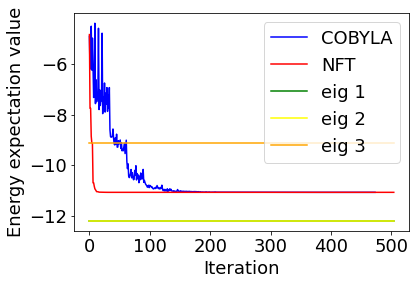

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["font.size"] = 18
# plt.plot(cost_history_1_1, color="red", label="VQE_1_1")
# plt.plot(cost_history_2_1, color="green", label="VQE_2_1")
plt.plot(cost_history_3_1, color="blue", label="COBYLA")
plt.plot(cost_history_3_1_2, color="red", label="NFT")
plt.plot(
    [w[0] for i in range(max(len(cost_history_3_1), len(cost_history_3_1_2)))],
    color="green",
    label="eig 1",
)
plt.plot(
    [w[1] for i in range(max(len(cost_history_3_1), len(cost_history_3_1_2)))],
    color="yellow",
    label="eig 2",
)
plt.plot(
    [w[2] for i in range(max(len(cost_history_3_1), len(cost_history_3_1_2)))],
    color="orange",
    label="eig 3",
)

# plt.plot(cost_history_3_1_3, color="green", label="VQE_3_1_3")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [12]:
from rounding import MagicRounding

# mr_1_1 = MagicRounding(1, 1, 10000, vqe_1_1, qrac_1_1)
# mr_2_1 = MagicRounding(2, 1, 10000, vqe_2_1, qrac_2_1)
mr_3_1 = MagicRounding(3, 1, 10000, vqe_3_1, qrac_3_1)
mr_3_1_2 = MagicRounding(3, 1, 10000, vqe_3_1_2, qrac_3_1)
mr_3_1_3 = MagicRounding(3, 1, 10000, vqe_3_1_3, qrac_3_1)

# sol_counts_1_1 = mr_1_1.round(best_theta_list_1_1)
# sol_counts_2_1 = mr_2_1.round(best_theta_list_2_1)
sol_counts_3_1 = mr_3_1.round(best_theta_list_3_1)
sol_counts_3_1_2 = mr_3_1_2.round(best_theta_list_3_1_2)
sol_counts_3_1_3 = mr_3_1_3.round(best_theta_list_3_1_3)

NameError: name 'vqe_3_1_3' is not defined

In [24]:
# maxcut_vals_1_1 = mr_1_1.get_objective_value_counts(model, sol_counts_1_1)
# maxcut_vals_2_1 = mr_2_1.get_objective_value_counts(model, sol_counts_2_1)
maxcut_vals_3_1 = mr_3_1.get_objective_value_counts(model, sol_counts_3_1)
maxcut_vals_3_1_2 = mr_3_1_2.get_objective_value_counts(model, sol_counts_3_1_2)
maxcut_vals_3_1_3 = mr_3_1_3.get_objective_value_counts(model, sol_counts_3_1_3)

# print(maxcut_vals_1_1)
# print(maxcut_vals_2_1)
print(maxcut_vals_3_1)
print(maxcut_vals_3_1_2)
print(maxcut_vals_3_1_3)

{13.0: 1572, 12.0: 1528, 11.0: 1354, 14.0: 1290, 10.0: 1141, 15.0: 841, 9.0: 760, 16.0: 446, 8.0: 406, 7.0: 213, 17.0: 160, 6.0: 154, 18.0: 68, 5.0: 35, 19.0: 14, 20.0: 7, 4.0: 7, 3.0: 4}
{13.0: 1598, 12.0: 1579, 14.0: 1366, 11.0: 1293, 10.0: 1044, 15.0: 834, 9.0: 765, 16.0: 445, 8.0: 419, 7.0: 218, 17.0: 191, 6.0: 117, 18.0: 61, 5.0: 31, 19.0: 23, 3.0: 8, 4.0: 5, 20.0: 2, 21.0: 1}
{12.0: 1571, 13.0: 1563, 11.0: 1339, 14.0: 1307, 10.0: 1082, 15.0: 869, 9.0: 720, 16.0: 465, 8.0: 425, 7.0: 211, 17.0: 201, 6.0: 97, 18.0: 73, 5.0: 36, 19.0: 21, 4.0: 7, 20.0: 6, 3.0: 5, 0.0: 1, 21.0: 1}


In [14]:
model.solve().get_objective_value()

21.0